<a href="https://colab.research.google.com/github/TomasWeinstabl/Entregas/blob/main/Ventas_de_Avocado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-14-280c5a477973>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['revenue'] = df_2018['AveragePrice'] * df_2018['Total Volume']


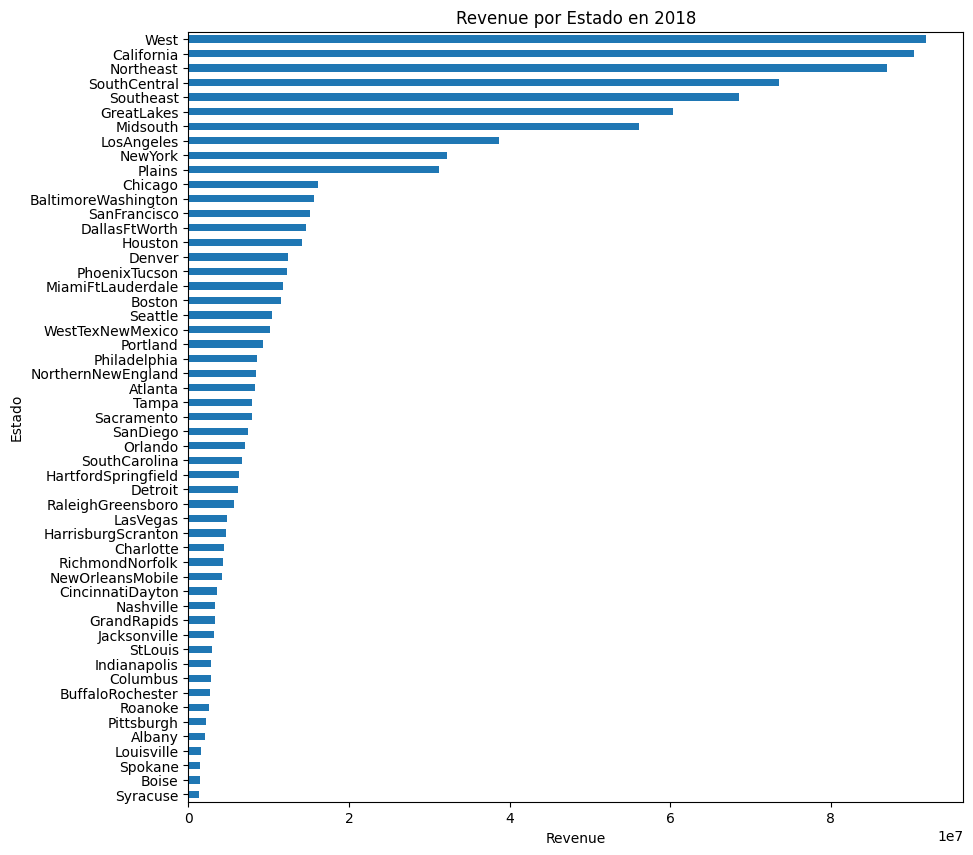

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/avocado.csv')

df_2018 = df[(df['year'] == 2018) & (df['region'] != 'TotalUS')]

df_2018['revenue'] = df_2018['AveragePrice'] * df_2018['Total Volume']
revenue_by_state = df_2018.groupby('region')['revenue'].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 10))
revenue_by_state.plot(kind='barh')
plt.title('Revenue por Estado en 2018')
plt.xlabel('Revenue')
plt.ylabel('Estado')
plt.show()

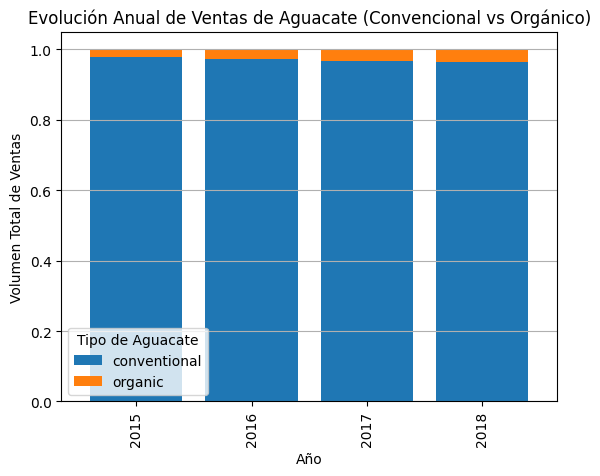

In [15]:
df_filtered = df[df['type'].isin(['conventional', 'organic'])]
df_grouped = df_filtered.groupby(['year', 'type'])['Total Volume'].sum().unstack()

df_grouped_pct = df_grouped.div(df_grouped.sum(axis=1), axis=0)

df_grouped_pct.plot(kind='bar', stacked=True, width=0.8)

plt.title('Evolución Anual de Ventas de Aguacate (Convencional vs Orgánico)')
plt.xlabel('Año')
plt.ylabel('Volumen Total de Ventas')
plt.legend(title='Tipo de Aguacate')
plt.grid(axis='y')

plt.show()

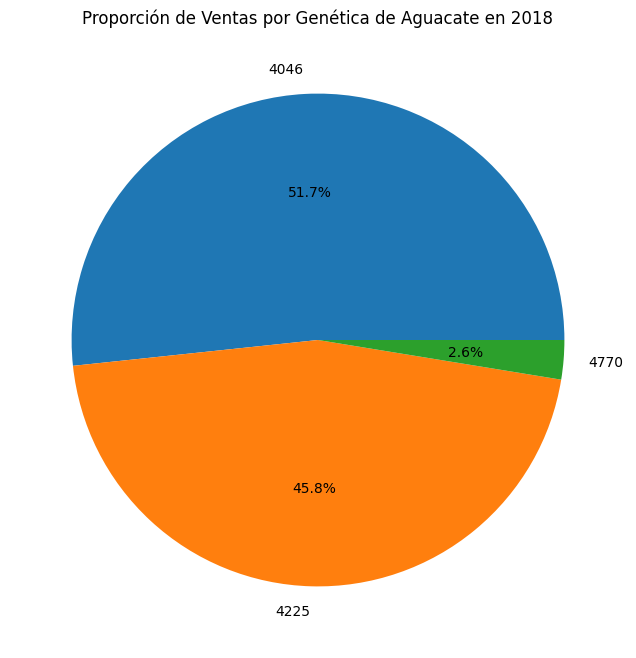

In [16]:
df_2018 = df[df['year'] == 2018]
data_to_plot = df_2018[['4046', '4225', '4770']].sum()

plt.figure(figsize=(8, 8))
plt.pie(data_to_plot, labels=data_to_plot.index, autopct='%1.1f%%')
plt.title('Proporción de Ventas por Genética de Aguacate en 2018')
plt.show()

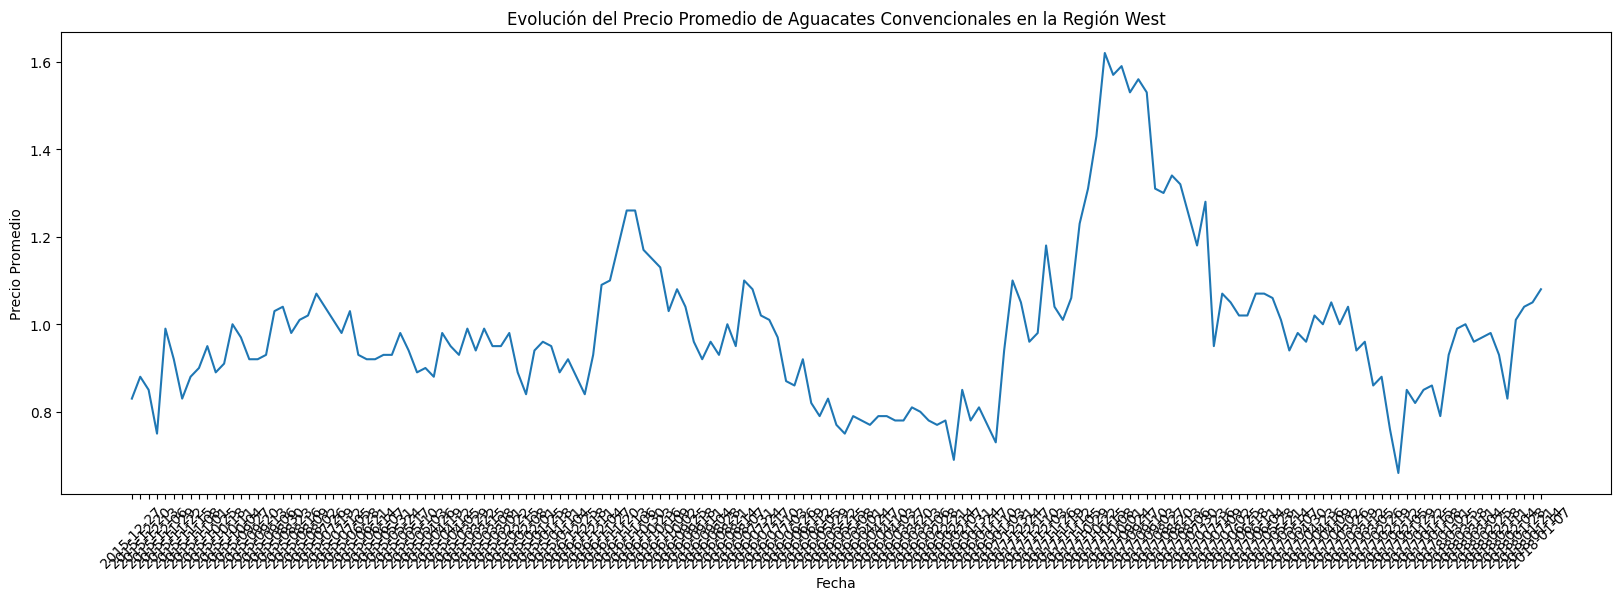

In [17]:
import seaborn as sns

df_west_conventional = df[(df['region'] == 'West') & (df['type'] == 'conventional')]

plt.figure(figsize=(20, 6))
sns.lineplot(x='Date', y='AveragePrice', data=df_west_conventional)
plt.title('Evolución del Precio Promedio de Aguacates Convencionales en la Región West')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.show()

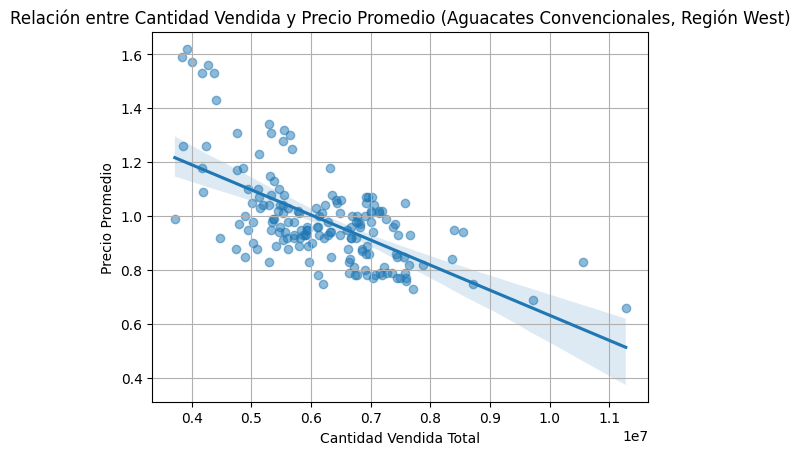

In [18]:
sns.regplot(x='Total Volume', y='AveragePrice', data=df_west_conventional, scatter_kws={'alpha':0.5})
plt.title('Relación entre Cantidad Vendida y Precio Promedio (Aguacates Convencionales, Región West)')
plt.xlabel('Cantidad Vendida Total')
plt.ylabel('Precio Promedio')
plt.grid(True)
plt.show()

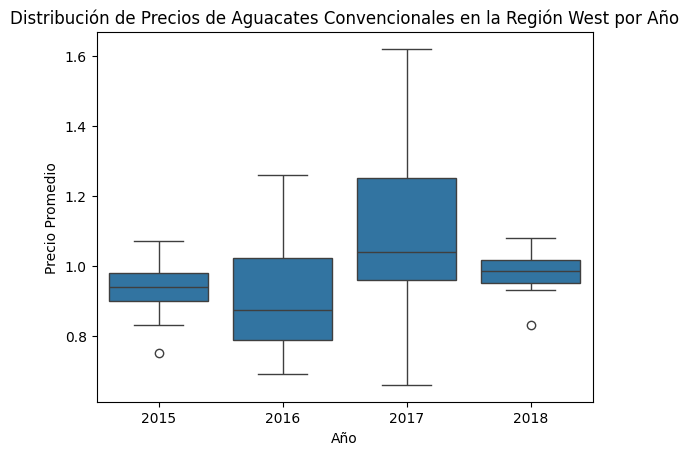

In [19]:
sns.boxplot(x='year', y='AveragePrice', data=df_west_conventional)
plt.title('Distribución de Precios de Aguacates Convencionales en la Región West por Año')
plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.show()